# graphviz_test

## Testing graphviz to create and export graphs

Let us test the `graphviz` package and try to export some graphs.

In [1]:
# inline plots
%matplotlib inline

# imports
import graphviz
import scipy as sp
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# show more columns
pd.set_option('display.max_columns', 100)

## Toy data

Let us generate some toy data, so we can play with graphviz.

In [2]:
# let us build a "to" and "from" dataset of causal relationships
df = pd.DataFrame({'start': np.random.choice(['A','B','C','D','E','F','G','H','I'], 40),
                   'end': np.random.choice(['A','B','C','D','E','F','G','H','I'], 40),
                   'weight': np.random.exponential(size=40) * 100})

In [3]:
# remove repated relationships
df = (df
      .groupby(['start','end']).sum()
      .reset_index()
      .query("""start != end""")
      .set_index(['start','end']))

In [4]:
# let us check the data
df

weight
start end            
A     B     22.817380
      G    148.726969
B     A    496.873909
      C    128.068021
      D     99.972823
      E    321.608186
      H     12.443462
C     A    610.277051
      G     53.923700
      I     34.478392
D     C    345.884110
      F    197.831522
      H      9.320368
E     A      4.200648
      B     59.618973
      C     44.566193
      D     90.204104
      H     35.626675
F     G     52.815787
      H     37.057479
G     A    333.980717
      F     23.605345
      I    187.243111
H     A    103.054255
      G     32.329098
I     B    111.046730
      G    140.813485

## Drawing a graph

Let us draw increasingly better graphs using the toy data.

##### Simple raw graph

In [5]:
# instance of graph object
graph = graphviz.Digraph()

In [6]:
# let us add the edges
for index, row in df.iterrows():
    graph.edge(index[0], index[1])

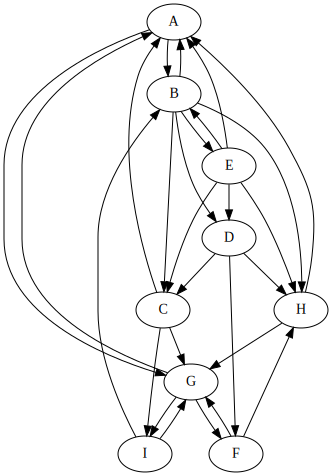

In [7]:
# let us show!
graph

##### Improvements on formatting

In [8]:
# instance of graph object
graph = graphviz.Digraph()

In [9]:
# parameter for the background
#graph.attr(bgcolor='blue:white')

# setting parameters for all nodes
graph.attr('node', shape='circle')

# setting parameters for all edges
graph.attr('edge', style='dashed')

In [10]:
# node color by edge #

# F edge has its own color
graph.attr('node', color='orange', style='filled')
graph.node('F')

# all nodes that are directly linked to F are red
graph.attr('node', color='red')

# finding these nodes
F_linked = df.reset_index().query("""(start =='F') | (end == 'F')""")
F_linked = np.unique(list(F_linked['start'].unique()) + list(F_linked['end'].unique()))
for node_name in F_linked:
    graph.node(node_name)

# the rest are blue
graph.attr('node', color='blue')

In [12]:
# let us add the edges
for index, row in df.iterrows():
    graph.edge(index[0], index[1], label=str(int(row['weight'])))

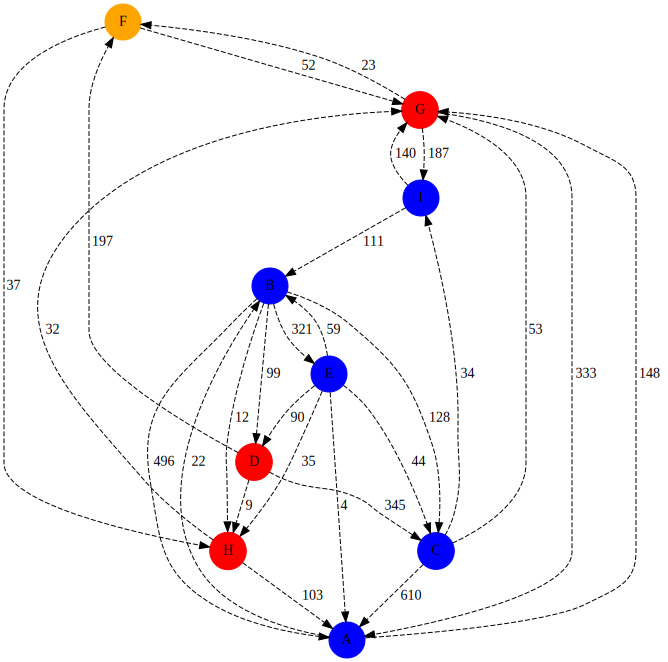

In [13]:
# let us show!
graph

## Using `networkx`

The `networkx` package might allow us to do some other cool stuff. Let us try it.

In [51]:
# creating a graph
G = nx.DiGraph()

In [52]:
# let us add all nodes
G.add_nodes_from(np.unique(list(df.reset_index()['start'].unique()) + list(df.reset_index()['end'].unique())))

In [53]:
# let us add all edges
G.add_edges_from([(v.values[0],v.values[1],{'weight':v.values[2], 'style':'dashed'}) for i, v in df.reset_index().iterrows()])

In [54]:
# let us add color attributes to the edges #

# initialize all nodes with color blue
for node_name in G.nodes():
    G.node[node_name]['color'] = 'blue'

# all nodes that are directly linked to F are red
F_linked = df.reset_index().query("""(start =='F') | (end == 'F')""")
F_linked = np.unique(list(F_linked['start'].unique()) + list(F_linked['end'].unique()))
for node_name in F_linked:
    G.node[node_name]['color'] = 'red'
    
# F edge has its own color
G.node['F']['color'] = 'orange'

/home/gdmarmerola/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/gdmarmerola/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/gdmarmerola/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/gdmarmerola/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnin

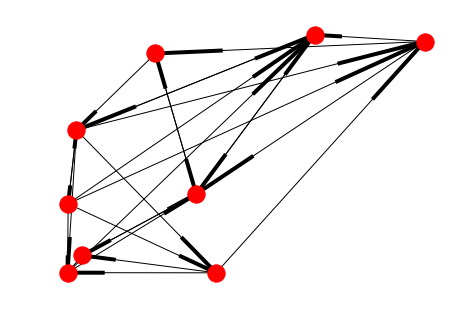

In [60]:
nx.draw_random(G);